In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Load Dataset

In [11]:
df = pd.read_csv("Iris.csv")
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [13]:
df = df.drop(columns = ['Id'])
df.head()


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [14]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [15]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


Exploratory Data Analysis

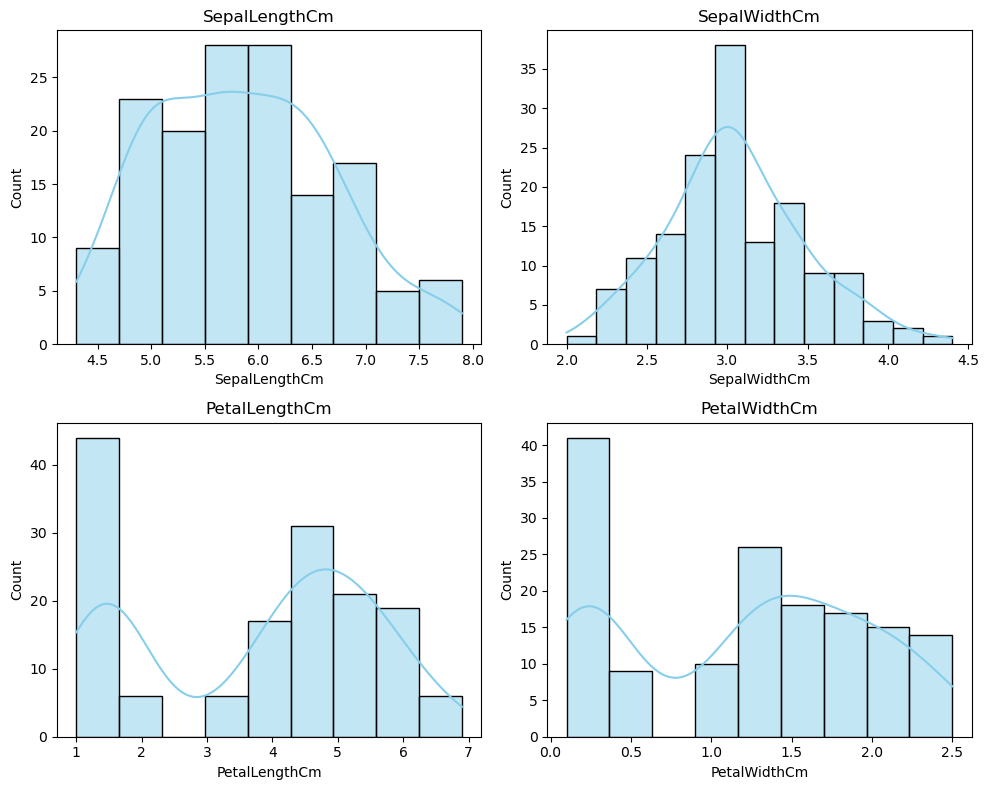

In [38]:
plt.figure(figsize=(10, 8))  # Adjust figure size

# Plot 1
plt.subplot(2, 2, 1)
sns.histplot(df['SepalLengthCm'], color='skyblue', kde=True)
plt.title("SepalLengthCm")

# Plot 2
plt.subplot(2, 2, 2)
sns.histplot(df['SepalWidthCm'], color='skyblue', kde=True)
plt.title("SepalWidthCm")

# Plot 3
plt.subplot(2, 2, 3)
sns.histplot(df['PetalLengthCm'], color='skyblue', kde=True)
plt.title("PetalLengthCm")

# Plot 4
plt.subplot(2, 2, 4)
sns.histplot(df['PetalWidthCm'], color='skyblue', kde=True)
plt.title("PetalWidthCm")

plt.tight_layout()  # Prevent overlapping
plt.show()


Scatter Plot

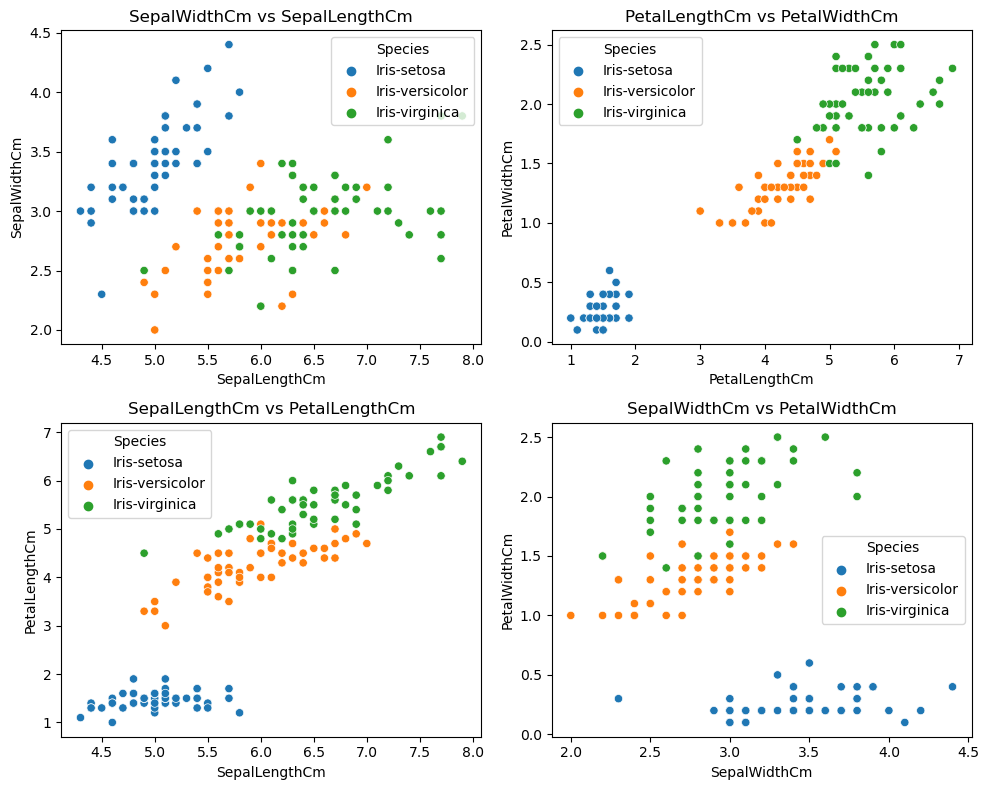

In [55]:
plt.figure(figsize=(10, 8))

#Plot1
plt.subplot(2,2,1)
sns.scatterplot(x= 'SepalLengthCm' , y= 'SepalWidthCm', data=df, color='skyblue', hue='Species')
plt.title("SepalWidthCm vs SepalLengthCm")

#Plot2
plt.subplot(2,2,2)
sns.scatterplot(x= 'PetalLengthCm' , y= 'PetalWidthCm',  data=df, color='skyblue', hue='Species')
plt.title("PetalLengthCm vs PetalWidthCm")

#plot3
plt.subplot(2,2,3)
sns.scatterplot(x= 'SepalLengthCm' , y= 'PetalLengthCm',  data=df, color='skyblue', hue='Species')
plt.title("SepalLengthCm vs PetalLengthCm")

#plot4
plt.subplot(2,2,4)
sns.scatterplot(x= 'SepalWidthCm' , y= 'PetalWidthCm',  data=df, color='skyblue', hue='Species')
plt.title("SepalWidthCm vs PetalWidthCm")


plt.tight_layout()
plt.show()

Correlation Matrix

In [56]:
df.drop(columns=['Species']).corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


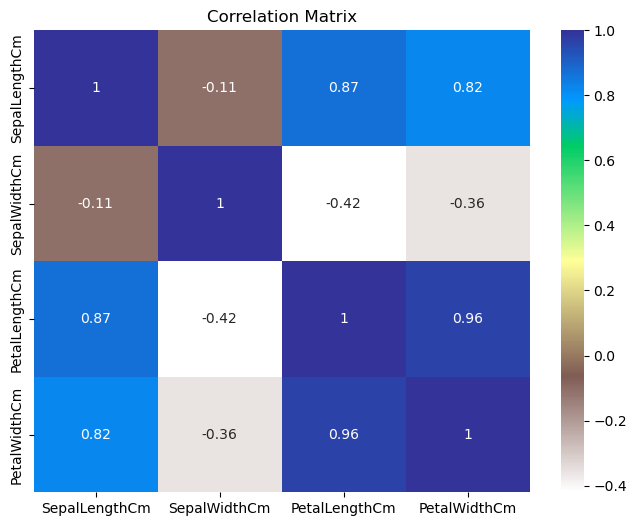

In [59]:
figure, ax = plt.subplots(figsize=(8,6))
sns.heatmap(df.drop(columns=['Species']).corr(), annot=True, cmap='terrain_r', edgecolor='Black')
plt.title('Correlation Matrix')
plt.show()

Model Tranning

In [60]:
from sklearn.model_selection import train_test_split
x = df.drop(columns=['Species'])
y = df['Species']

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.20)

In [61]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [62]:
model.fit(x_train, y_train)

LogisticRegression()

In [63]:
print('Accuracy of the model is: ', model.score(x_test,y_test)*100)

Accuracy of the model is:  100.0


In [64]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(x_train,y_train)


KNeighborsClassifier()

In [65]:
print('Accuracy of the model is: ', knn.score(x_test,y_test)*100)

Accuracy of the model is:  100.0


C:\Users\jayes\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [67]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(x_train,y_train)

DecisionTreeClassifier()

In [68]:
print('Accuracy of the model is: ', dtc.score(x_test,y_test)*100)

Accuracy of the model is:  100.0


Save Model as Pickel File 

In [69]:
import pickle
filname = 'iris_model.sav'
pickle.dump(dtc, open(filname,'wb'))

In [71]:
x_test.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
114,5.8,2.8,5.1,2.4
89,5.5,2.5,4.0,1.3
32,5.2,4.1,1.5,0.1
22,4.6,3.6,1.0,0.2
82,5.8,2.7,3.9,1.2


In [72]:
load_model = pickle.load(open(filname, 'rb'))

In [73]:
load_model.predict([[6.0,2.2,4.0,1.0]])

C:\Users\jayes\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array(['Iris-versicolor'], dtype=object)